# 1. Data Preprocessing and Cleaning :

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [2]:
# Define column names based on the dataset's documentation
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "class"
]

In [3]:
# Load the dataset with specified column names and handle initial spaces in the column names
data = pd.read_csv("adult.data", header=None, names=column_names, skipinitialspace=True)

In [4]:
# Display the first few rows of the dataset to understand its structure
print(data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  class  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [5]:
#  Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


In [6]:
# Handle missing values
data.dropna(inplace=True)

In [7]:
# Check for outliers and anomalies in numerical columns using descriptive statistics
numerical_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
print("Descriptive Statistics for Numerical Columns:")
print(data[numerical_cols].describe())

Descriptive Statistics for Numerical Columns:
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [8]:
# Handle outliers using z-score or IQR method for numerical columns
# Example using z-score for 'age' column
from scipy.stats import zscore
data['age_zscore'] = zscore(data['age'])
data = data[(data['age_zscore'] < 3) & (data['age_zscore'] > -3)]

In [9]:
# Drop the temporary z-score column after handling outliers
data.drop('age_zscore', axis=1, inplace=True)

In [10]:
# Verify if outliers are handled
print("Descriptive Statistics after handling outliers:")
print(data[numerical_cols].describe())

Descriptive Statistics after handling outliers:
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32440.000000  3.244000e+04   32440.000000  32440.000000  32440.000000   
mean      38.409155  1.898807e+05      10.083477   1077.960697     87.038502   
std       13.367250  1.055863e+05       2.568570   7395.791540    401.496483   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178490e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784780e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.372932e+05      12.000000      0.000000      0.000000   
max       79.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32440.000000  
mean        40.482059  
std         12.302738  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


# 2. Exploratory Data Analysis (EDA) 

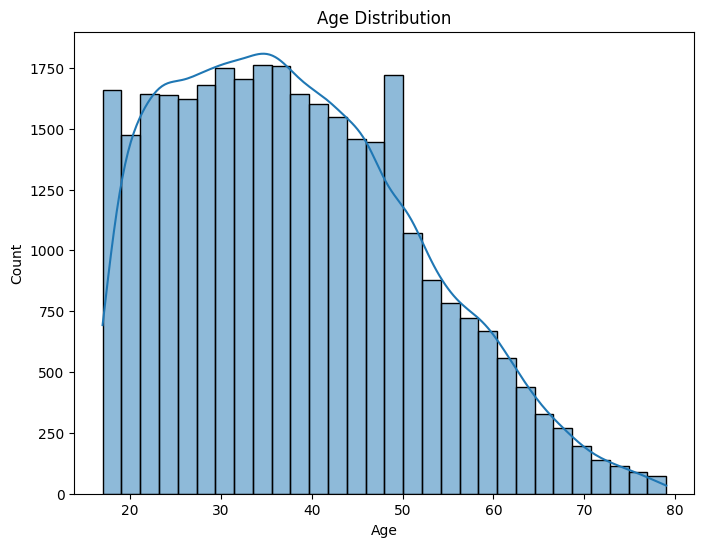

In [11]:
# Histogram for age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

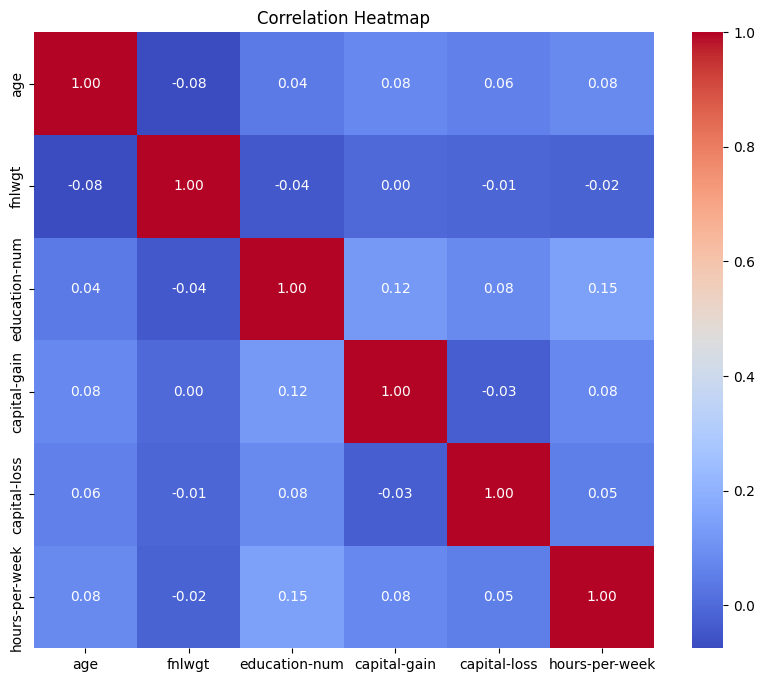

In [12]:
# Select only numerical columns for correlation analysis
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Correlation Analysis: Visualizing correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# # Pair Plot: Visualizing relationships between numerical features
# sns.pairplot(data[numerical_cols])
# plt.suptitle('Pair Plot for Numerical Features', y=1.02)
# plt.show()

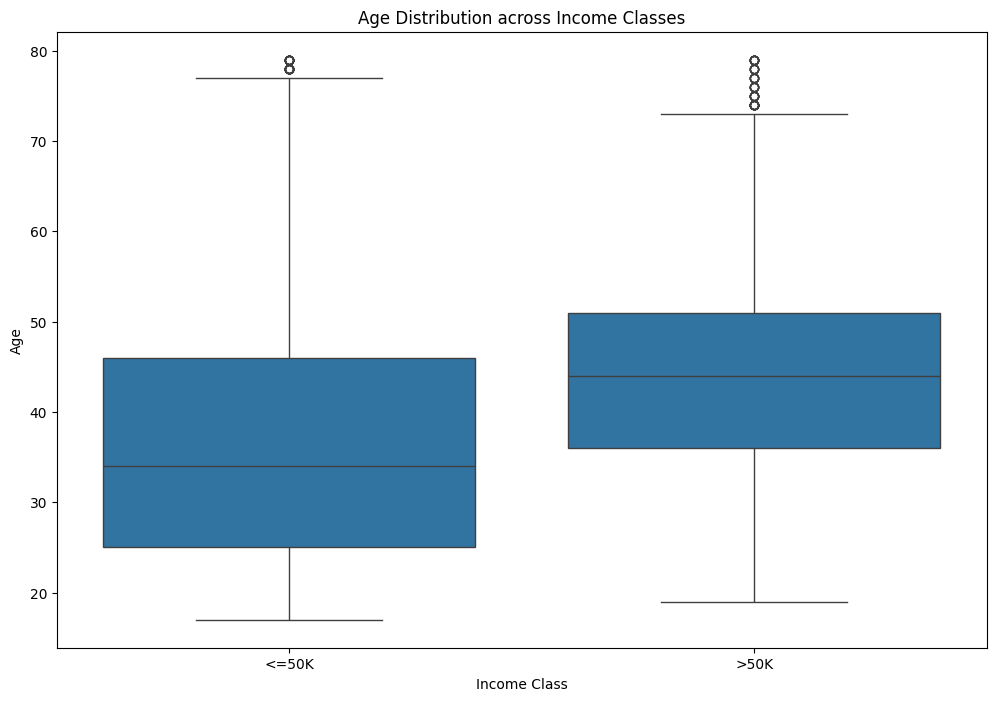

In [14]:
# Box Plot: Visualizing distribution of numerical features across income classes
plt.figure(figsize=(12, 8))
sns.boxplot(x='class', y='age', data=data)
plt.xlabel('Income Class')
plt.ylabel('Age')
plt.title('Age Distribution across Income Classes')
plt.show()

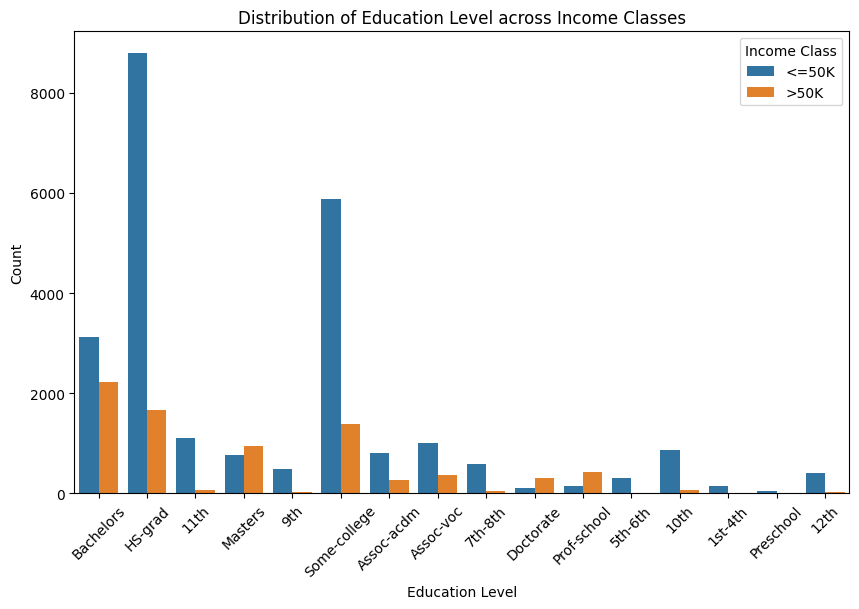

In [15]:
# Bar Plot: Visualizing distribution of categorical features
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='class', data=data)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Level across Income Classes')
plt.xticks(rotation=45)
plt.legend(title='Income Class')
plt.show()

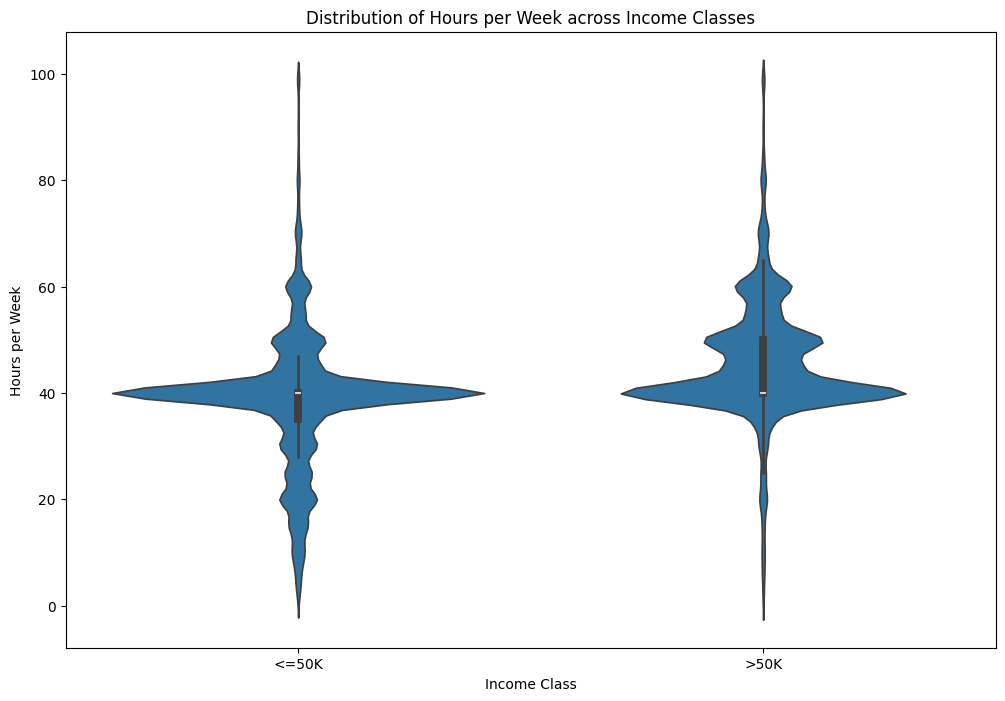

In [16]:
# Violin Plot: Visualizing distribution of numerical features across income classes
plt.figure(figsize=(12, 8))
sns.violinplot(x='class', y='hours-per-week', data=data)
plt.xlabel('Income Class')
plt.ylabel('Hours per Week')
plt.title('Distribution of Hours per Week across Income Classes')
plt.show()

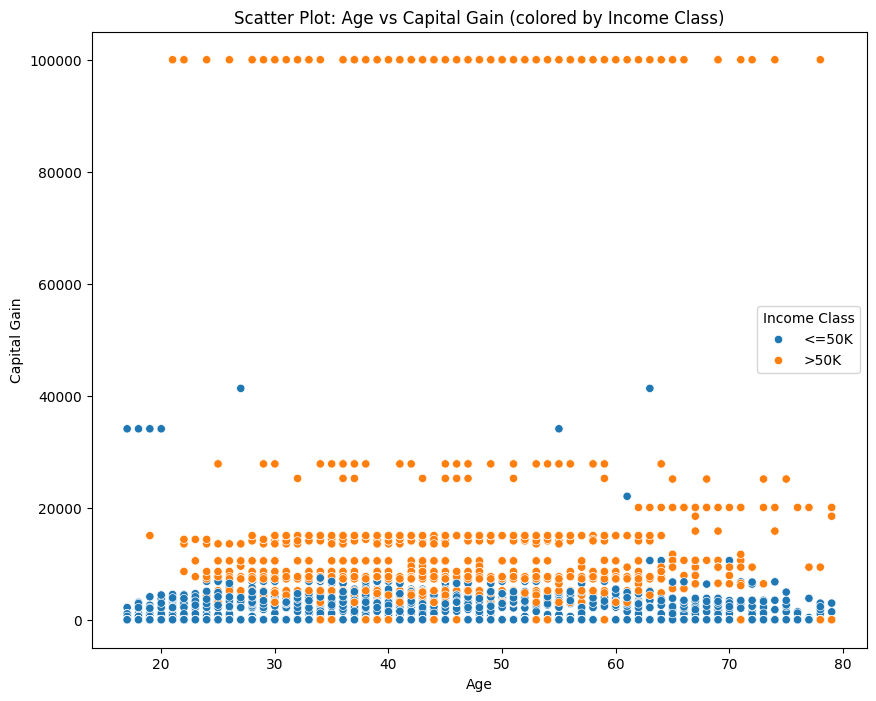

In [17]:
# Scatter Plot: Visualizing relationship between numerical features
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='capital-gain', hue='class', data=data)
plt.xlabel('Age')
plt.ylabel('Capital Gain')
plt.title('Scatter Plot: Age vs Capital Gain (colored by Income Class)')
plt.legend(title='Income Class')
plt.show()

# 3. Feature Engineering:

In [18]:
categorical_cols = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
# numerical_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

In [19]:
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [20]:
scaler = MinMaxScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

In [21]:
print(data_encoded.columns)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'class', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=101)


In [22]:
data_encoded['gov_employment'] = data_encoded['workclass_Federal-gov'] | data_encoded['workclass_Local-gov']

In [23]:
# Print the new column and its values
print(data_encoded['gov_employment'])

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: gov_employment, Length: 32440, dtype: bool


In [24]:
# Check the engineered features and updated dataset
print(data_encoded.head())

        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.354839  0.044302       0.800000       0.02174           0.0   
1  0.532258  0.048238       0.800000       0.00000           0.0   
2  0.338710  0.138113       0.533333       0.00000           0.0   
3  0.580645  0.151068       0.400000       0.00000           0.0   
4  0.177419  0.221488       0.800000       0.00000           0.0   

   hours-per-week  class  workclass_Federal-gov  workclass_Local-gov  \
0        0.397959  <=50K                  False                False   
1        0.122449  <=50K                  False                False   
2        0.397959  <=50K                  False                False   
3        0.397959  <=50K                  False                False   
4        0.397959  <=50K                  False                False   

   workclass_Never-worked  ...  native-country_Puerto-Rico  \
0                   False  ...                       False   
1                   False  ...    

# Model Selection, Training, and Evaluation

In [25]:
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'  # Pass through numerical columns as-is
)

In [28]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Fit and transform the data using the ColumnTransformer
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [30]:
# Initialize and train the Random Forest Classifier using the encoded data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Make predictions
y_pred = model.predict(X_test_encoded)

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8606658446362515


In [34]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91      4988
        >50K       0.72      0.64      0.68      1500

    accuracy                           0.86      6488
   macro avg       0.81      0.78      0.80      6488
weighted avg       0.86      0.86      0.86      6488



In [35]:
#  Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[4621  367]
 [ 537  963]]


# Hyperparameter Tuning

In [37]:
# Perform one-hot encoding on categorical columns
encoder = OneHotEncoder(drop='first')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

In [39]:
print("X_train_encoded shape:", X_train_encoded.shape)
print("X_train[numerical_cols] shape:", X_train[numerical_cols].shape)
print("X_test_encoded shape:", X_test_encoded.shape)
print("X_test[numerical_cols] shape:", X_test[numerical_cols].shape)

X_train_encoded shape: (25952, 94)
X_train[numerical_cols] shape: (25952, 6)
X_test_encoded shape: (6488, 94)
X_test[numerical_cols] shape: (6488, 6)


In [42]:
print("X_train_encoded sample:", X_train_encoded[:5])  # Print the first 5 rows as a sample

X_train_encoded sample:   (0, 3)	1.0
  (0, 18)	1.0
  (0, 24)	1.0
  (0, 35)	1.0
  (0, 51)	1.0
  (0, 52)	1.0
  (0, 91)	1.0
  (1, 4)	1.0
  (1, 18)	1.0
  (1, 24)	1.0
  (1, 32)	1.0
  (1, 47)	1.0
  (1, 51)	1.0
  (1, 91)	1.0
  (2, 6)	1.0
  (2, 14)	1.0
  (2, 29)	1.0
  (2, 46)	1.0
  (2, 51)	1.0
  (2, 52)	1.0
  (2, 91)	1.0
  (3, 3)	1.0
  (3, 16)	1.0
  (3, 32)	1.0
  (3, 43)	1.0
  (3, 51)	1.0
  (3, 52)	1.0
  (3, 91)	1.0
  (4, 3)	1.0
  (4, 22)	1.0
  (4, 29)	1.0
  (4, 46)	1.0
  (4, 51)	1.0
  (4, 91)	1.0


In [43]:
print("X_train[numerical_cols] sample:", X_train[numerical_cols][:5])  # Print the corresponding numerical columns

X_train[numerical_cols] sample:        age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
31270   53  127117              9             0             0              40
32560   52  287927              9         15024             0              40
8737    46  192779             12             0          2258              38
5837    30  133602             13             0             0              40
25511   30  251411             10             0             0              40


In [45]:
X_test_final = np.concatenate([X_test_encoded, X_test[numerical_cols]], axis=1)

ValueError: zero-dimensional arrays cannot be concatenated

In [ ]:
# Initialize RandomizedSearchCV with reduced search space and fewer iterations
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=5,  # Reduce the number of iterations
    cv=5,
    random_state=42,
    n_jobs=-1  # Utilize parallel processing
)
# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

In [ ]:
# Get the best hyperparameters and retrain the model
best_params = random_search.best_params_
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

In [ ]:
# Make predictions using the tuned model
y_pred_tuned = best_model.predict(X_test)

In [ ]:
# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tuned Model Accuracy:", accuracy_tuned)